In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### KNN

In [3]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

In [4]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


### Model & Tahmin

In [5]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [6]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [7]:
knn_model.n_neighbors

5

In [8]:
knn_model.metric

'minkowski'

In [9]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [10]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

### Model Tuning

In [13]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [14]:
range(10)

range(0, 10)

In [15]:
RMSE =[]

for k in range(10):
    k = k+1
    knn_model =KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k,"için RMSE değeri:",rmse)

k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [16]:
#GridSearchCV #hiperparametlerinin değerini değerlendiren fonksiyon

In [17]:
knn_params ={"n_neighbors":np.arange(1,30,1)}

In [18]:
knn = KNeighborsRegressor()

In [19]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [20]:
knn_cv_model.best_params_ #optimum parametre değeri

{'n_neighbors': 8}

In [21]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

421.6252180741266

### Destek Vektör Regresyonu (Support Vector Regression)

In [24]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [25]:
svr_model = SVR("linear").fit(X_train,y_train)

In [26]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [28]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [29]:
svr_model.intercept_

array([-80.15196151])

In [30]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [31]:
#test
y_pred=svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.04084185624924

#### Model Tuning

In [32]:
svr_model=SVR("linear")

In [33]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
svr_params = {"C": [0.1,0.5,1.3]}

In [35]:
svr_cv_model= GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,y_train)

In [36]:
svr_cv_model.best_params_

{'C': 0.5}

In [39]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5,verbose=2,n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished


In [40]:
svr_cv_model.best_params_

{'C': 0.5}

In [41]:
svr_tuned = SVR("linear",C=0.5).fit(X_train,y_train)

In [42]:
y_pred = svr_tuned.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.9874739022889

### Yapay Sinir Ağları

In [44]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [54]:
scaler = StandardScaler() #standartlaştırma dönüştürme

In [47]:
scaler.fit(X_train) #train setini standartlaştırma
X_train_scaled = scaler.transform(X_train)

In [55]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [56]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [57]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [58]:
mlp_model.predict(X_test_scaled)[0:5]

array([25.04824699, 39.86148909, 78.63178895, 11.90479678, 28.52413532])

In [59]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

655.7165722558782

### Model Tuning

In [64]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.001,0.0001], 
             "hidden_layer_sizes": [(10,20),(5,5),(100,100)]}

In [76]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=5,verbose=2,n_jobs=-1).fit(X_train_scaled,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.4s finished


In [77]:
mlp_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}

In [81]:
#final
mlp_tuned = MLPRegressor(alpha = 0.01,hidden_layer_sizes = (100,100)).fit(X_train_scaled,y_train)

In [82]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

352.7511476764388

### CART (Classification and Regression Tree)

In [137]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

In [138]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [139]:
# model & tahmin

In [140]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10) #dallanma kontrolü parametresi, bölüm arttıkça arada kalan gözlem sayısı azalır

In [141]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

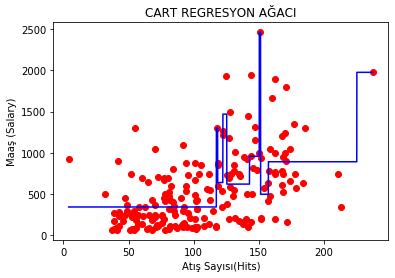

In [142]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid =X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color='red')

plt.plot(X_grid,cart_model.predict(X_grid),color='blue')

plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)');

In [143]:
#tek değişkenli tahmin

In [144]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [145]:
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [146]:
# tüm değişkenler

In [147]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [148]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

#### Model Tuning

In [149]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [150]:
cart_model = DecisionTreeRegressor(max_depth= 5).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

448.21200029739276

In [151]:
?cart_model

Type:        DecisionTreeRegressor
String form:
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_ <...> eight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
File:        c:\anaconda3\lib\site-packages\sklearn\tree\tree.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="mse")
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter

In [152]:
cart_params = {"max_depth":[2,3,4,5,10,20],
               "min_samples_split":[2,10,5,30,50,10]}

In [153]:
cart_model = DecisionTreeRegressor()

In [154]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [155]:
cart_cv_model.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [158]:
#final model # 10,50 çıkmadı ama daha iyi sonucu bu veriyor

In [165]:
cart_tuned= DecisionTreeRegressor(max_depth=10,min_samples_split=50).fit(X_train,y_train)

In [166]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

421.25868329005385

### Random Forests

In [3]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [4]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train) #farklı gözlem birimleri olmasın diye

In [5]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [6]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

373.04044281427

#### Model Tuning

In [9]:
rf_params = {"max_depth": [5,8,10],
            "max_features":[2,5,10],
            "n_estimators":[200,500,1000,2000],
            "min_samples_split":[2,10,80,100]}

In [10]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 24.7min finished


In [13]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [15]:
rf_model = RandomForestRegressor(random_state=42,
                                max_depth=8,
                                max_features=2,
                                min_samples_split=2,
                                n_estimators=200)
rf_tuned = rf_model.fit(X_train,y_train)

In [16]:
rf_tuned

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [18]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

348.2372919119422

### Değişken Önem Düzeyi

In [20]:
rf_tuned.feature_importances_*100

array([5.83939544, 6.29671412, 3.5548773 , 4.16102585, 4.66774588,
       4.98722442, 7.39418621, 9.74125251, 8.68525461, 7.86496982,
       8.76583148, 8.2943961 , 9.70887995, 4.70922791, 2.05255543,
       1.85359068, 0.3831876 , 0.56203099, 0.47765369])

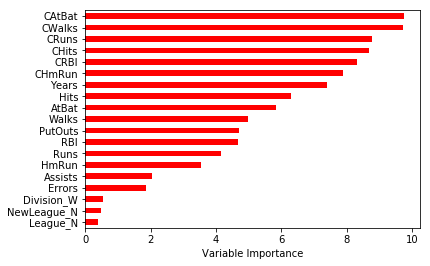

In [21]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},#
                         index= X_train.columns)

Importance.sort_values(by ='Importance', #importance sutununa göe sırala
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r',)

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

###  Gradient Boosting Machines

In [22]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [23]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train) #model kurmak

In [24]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [25]:
y_pred = gbm_model.predict(X_test) #tahmin yapmak

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred)) #tahmin sonucunu hesaplamak

362.47869824117424